Finished TC sim
Finished TC sim


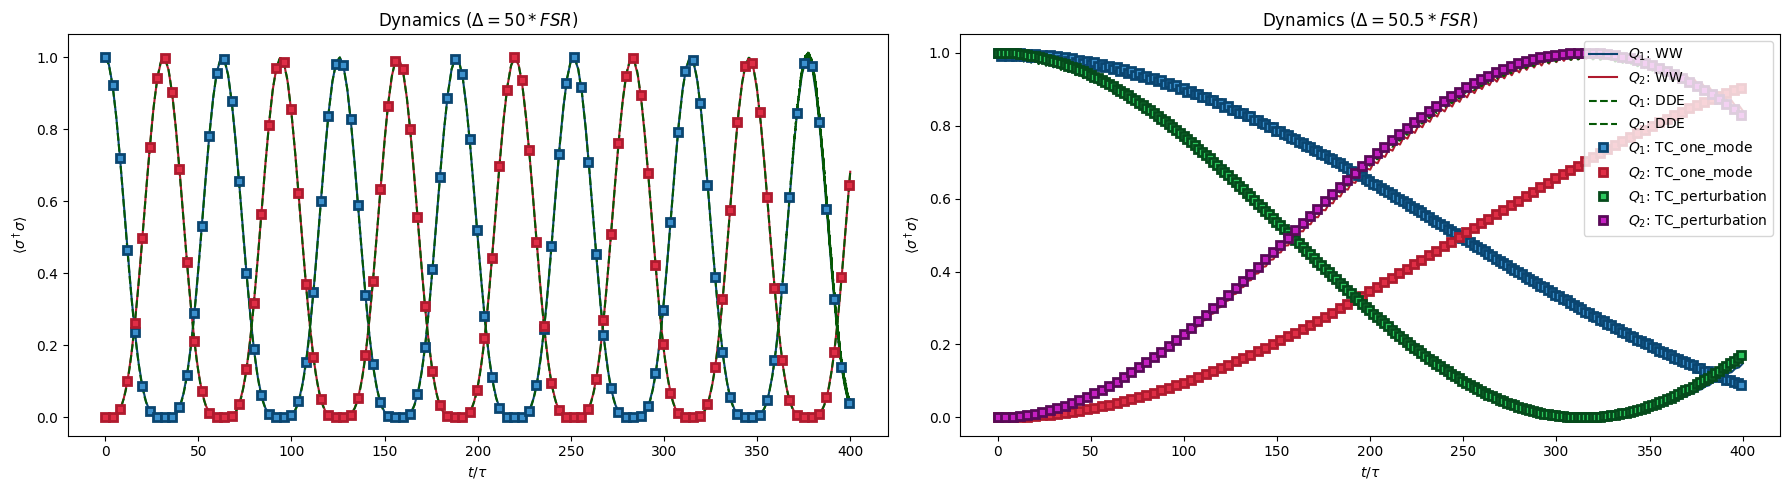

In [3]:
from expt_sets import expt_001_dynamics

expt_001_dynamics(Delta=50.5, gamma=0.01, tau=1, T=400.0, dt_max=0.01, n_steps=201)

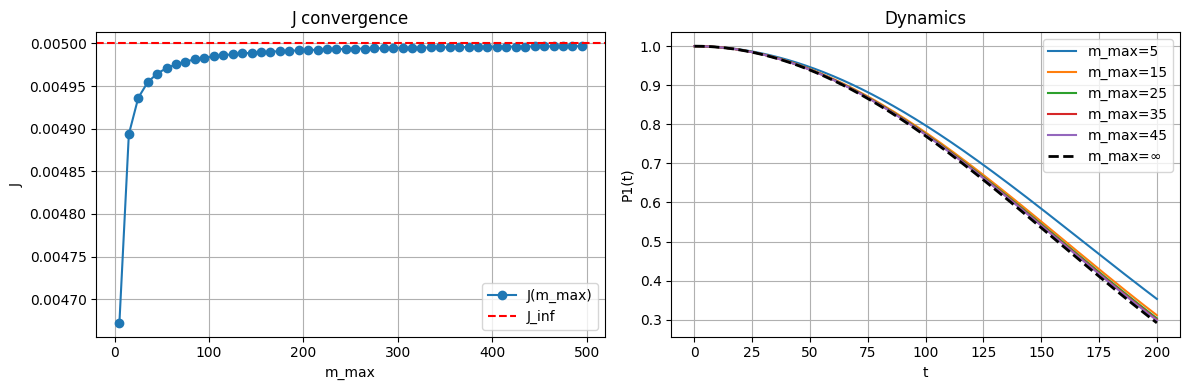

In [14]:
from expt_sets import expt_002_perturbation_convergence
import numpy as np

expt_002_perturbation_convergence(
    Delta=0.5 * np.pi,
    gamma=0.01,
    FSR=np.pi,
    m_list=np.arange(5, 500, 10),
    sample_m=[5, 15, 25, 35, 45],
    T=200,
    n_steps=2001,
)

In [ ]:
from expt_sets import expt_003_swapspeed
import numpy as np

gamma_list = np.linspace(0.01, 0.2, 20)
t_peaks, F_list = expt_003_swapspped(
    Delta=0.3 * np.pi,
    tau=50,
    gamma_list=gamma_list,
)
